# Import Library

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Code


In [101]:

#all INFORMATION OF PASSEENGER
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
#DATA OF  SUBSET THE PASSENGER
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")


# View

In [102]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S


In [103]:
df_train.shape

(891, 12)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Clear Data Dummy

In [106]:
df_train.duplicated().sum()

0

# Values Null 

In [107]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Cabin have 687 null this is one aspect that need view if important 

# Valores Unicos

In [108]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

passengerId havent important of the prediction

In [109]:
column_categories = df_train.select_dtypes(include=['object']).columns
for columns in column_categories:
    if df_train[columns].nunique()<=10:
        print(f"{columns}: {df_train[columns].unique()}")

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


In [110]:
column_numerics = df_train.select_dtypes(include=['int64','float64']).columns
for columns in column_numerics:
    if df_train[columns].nunique()<=10:
        print(f"{columns}: {df_train[columns].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


## eda 

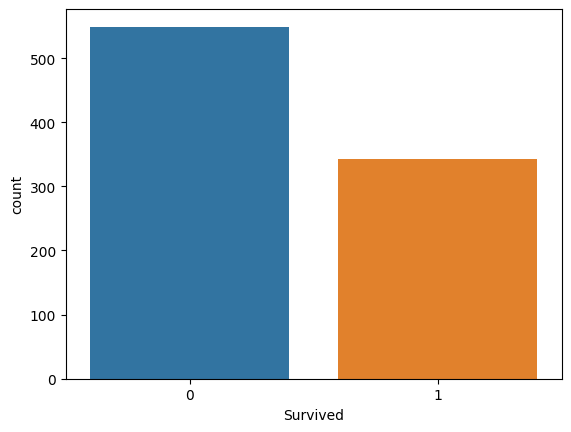

In [111]:
sns.countplot(x='Survived', data= df_train)
plt.show()

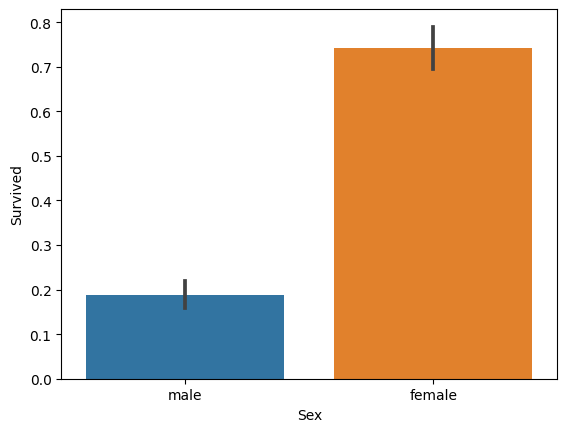

In [112]:
sns.barplot(x = 'Sex', y = 'Survived', data = df_train)
plt.show()

# Conclude 
* PassengerId, Cabin, Fare, Ticket and name arent important from to analisys

In [113]:
df_train = df_train.drop(columns = [ 'Cabin', 'Fare', 'Ticket', 'Name'])
df_test = df_test.drop (columns = [ 'Cabin', 'Fare', 'Ticket', 'Name'])
df_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


# Data prepared

## Separation prediction and target

In [114]:
X = df_train.drop(['Survived'], axis = 1)
y = df_train.Survived

## Pass categories columns to numerics

In [115]:
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder= OrdinalEncoder()
X[object_cols]= ordinal_encoder.fit_transform(X[object_cols])

In [116]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0


# Null values

In [117]:
imputer = SimpleImputer()
x_transformed = pd.DataFrame(imputer.fit_transform(X))

x_transformed.columns = X.columns

In [118]:
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# 4. Model

In [119]:
model =  RandomForestClassifier()
model.fit(x_transformed, y)

RandomForestClassifier()

# 5. Predictions

In [120]:
df_test[object_cols]= ordinal_encoder.fit_transform(df_test[object_cols])

df_test_transformed = pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns =  df_test.columns

predictions = model.predict(df_test_transformed)

# Submission

In [121]:
output = pd.DataFrame({'passengerId' : df_test.PassengerId, 'Survived': predictions })
output.to_csv('submission.csv', index = False)